In [1]:
# NO CODE

from prob140 import *
from datascience import *
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

## The Poisson Distribution ##

Data scientists use probability distributions as *models* for how their data are generated. In this context a model is a set of assumptions involving probabilities. Almost invariably, models are simplified representations of complex real scenarios. 

The *Poisson* distribution is sometimes used to model the number of times a rare event occurs. It is named after its originator, the French mathematician, scientist, and engineer [Siméon Denis Poisson](https://en.wikipedia.org/wiki/Sim%C3%A9on_Denis_Poisson). The parameter of the Poisson distribution is a positive number which we will call $\mu$. A random variable $X$ has the Poisson distribution with parameter $\mu$ if

$$
P(X = k) ~ = ~ e^{-\mu} \frac{\mu^k}{k!}, ~~~ k = 0, 1, 2, \ldots
$$

The possible values of $X$ are all the non-negative integers. That's an infinite set.

The formula does indeed define a probability distribution:

$$
\sum_{k=0}^\infty e^{-\mu} \frac{\mu^k}{k!} ~ = ~ e^{-\mu} \sum_{k=0}^\infty \frac{\mu^k}{k!} ~ = ~ e^{-\mu} \cdot e^\mu ~ = ~ 1
$$

Notice that the probabilities in the Poisson distribution are proportional to the terms in the expansion of $e^\mu$. The multiplicative constant $e^{-\mu}$ makes the probabilities add up to 1.

The figure below is the probability histogram of the Poisson distribution in the case $\mu = 1.5$.

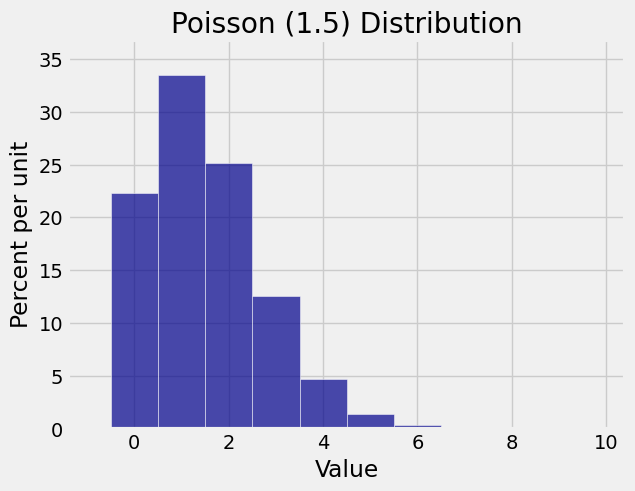

In [2]:
# NO CODE

mu = 1.5
k = np.arange(10)
probs = stats.poisson.pmf(k, mu)
dist = Table().values(k).probabilities(probs)
Plot(dist)
plt.title('Poisson (1.5) Distribution');

Even though there are infinitely many possible values, the probable values are a pretty small set, between 0 and about 6 or 7.

The tallest bar is at $k = 1$. This value 1 is called the *mode* of the distribution. It can be shown that the mode of the Poisson distribution is the integer part of $\mu$. If $\mu$ is an integer then there are two modes, $\mu$ and $\mu - 1$.

Here is the histogram of the Poisson $(3)$ distribution. There are two modes, at 3 and 2.

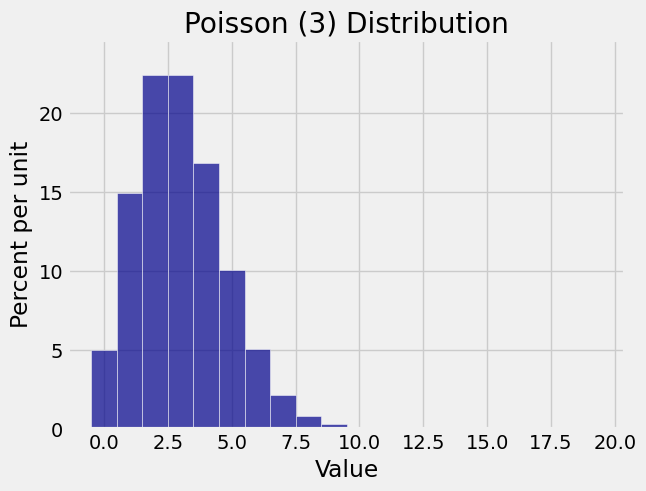

In [3]:
# NO CODE

mu = 3
k = np.arange(20)
probs = stats.poisson.pmf(k, mu)
dist = Table().values(k).probabilities(probs)
Plot(dist)
plt.title('Poisson (3) Distribution');

The histograms show why you might want to use these distributions as models for random counts that tend to be small.

### The Bombing of London ###
During World War II the German air force launched a massive bombing attack on Britain and on London in particular. The British press called this attack the Blitz, the German word for lightning.

A classic probability [text by William Feller](https://archive.org/details/AnIntroductionToProbabilityTheoryAndItsApplicationsVolume1) provides data about the number of times bombs fell in different parts of London. The data were recorded as follows.

The city was divided into 576 sub-regions which we will call locations. Officials recorded the number of times each location was hit by a bomb. The distribution is shown in the histogram below. It shows that about 40% of the locations did not suffer a hit. But about 60% did, and some were hit multiple times. A small percent of locations were hit five or more times. Those are not visible on the scale of this graph.

![Number of bomb hits](../images/blitz_dist.png)

Feller's book shows how this distribution is well approximated by the Poisson distribution with parameter $\mu = 0.93$. In the next chapter, we will see how the parameter was calculated. For now, see how closely the Poisson (0.93) distribution resembles the distribution of the data.

![Blitz Poisson approximation](../images/blitz_poisson.png)

The numerical values of the Poisson probabilities have been calculated using a call that should come as no surprise.

In [4]:
# stats.poisson.pmf(k_array, mu)

stats.poisson.pmf(np.arange(6), 0.93)

array([ 0.39455371,  0.36693495,  0.17062475,  0.05289367,  0.01229778,
        0.00228739])

### Defective Drives ###

You can work with Poisson distributions just as you worked with all the other distributions that we have studied. Here is an example.

A manufacturing process produces large cases of USB flash drives. In each case, the number of defective drives has the Poisson (2.5) distribution, independent of all other cases.

What is the chance that all of the next five cases contain more than one defective drive?

$$
\begin{align*}
& P(\text{Case 1 contains at more than one defective drive}) \\
& = ~ 1 - \big{(} e^{-2.5}\frac{2.5^0}{0!} + e^{-2.5}\frac{2.5^1}{1!} \big{)} \\
& = ~ p ~ \approx ~ 71.27\%
\end{align*}
$$

In [5]:
p = 1 - stats.poisson.cdf(1, 2.5)
p

0.71270250481635422

The answer is $p^5$ which is about 18.39%.

In [6]:
p ** 5

0.18388293444804887

### Sums of Independent Poisson Random Variables ###

A useful property of the Poisson distribution is that if $X$ and $Y$ are random variables such that

- $X$ and $Y$ are independent,
- $X$ has the Poisson $(\mu)$ distribution, and
- $Y$ has the Poisson $(\lambda)$ distribution,

then the sum $S = X + Y$ has the Poisson $(\mu + \lambda)$ distribution.

In this course you don't have to know how to prove this though the proof is not very hard. But you do have to be able to apply it, as in the following example.

An office building has three parking lots. For $i = 1, 2, 3$ let $X_i$ be the number of illegaly parked cars in Lot $i$, and let $X_i$ have the Poisson distribution with parameter $i$. Assume that $X_1, X_2, X_3$ are independent of each other.

What is the chance that there are no more than 10 illegally parked cars in all three lots combined?

The toal number of illegally parked cars $S = X_1 + X_2 + X_3$ has the Poisson distribution with parameter $1+2+3 = 6$. 

$$
P(S \le 10) ~ = ~ \sum_{k=0}^{10} e^{-6} \frac{6^k}{k!} ~ \approx ~ 95.74\%
$$

In [7]:
stats.poisson.cdf(10, 6)

0.95737907641746189

### The Law of Small Numbers ###

You may have noticed that the histograms of the Poisson distributions in this section don't look very different from histograms of the binomial distribution when the success probability $p$ is small. Indeed, one way in which the Poisson distribution arises in practice is as an approximation to a binomial distribution that has a large $n$ and a small $p$.

Let $X$ have the binomial $(n, p)$ distribution where $n$ is large and $p$ is small. Let $\mu = np$. We saw in the previous section that

$$
P(X = 0) ~ = ~ (1-p)^n ~ \approx ~ e^{-\mu} ~ = ~ e^{-\mu} \frac{\mu^0}{0!}
$$

which is the Poisson $(\mu)$ probability of 0 successes.

Next,

$$
\begin{align*}
P(X = 1) ~ = ~ \binom{n}{1}p(1-p)^{n-1} ~ &= ~ np\frac{(1-p)^n}{1-p} \\
&\approx ~ \mu e^{-\mu} ~ = ~ e^{-\mu} \frac{\mu^1}{1!}
\end{align*}
$$

which is the Poisson $(\mu)$ probability of 1 success.

By continuing in this way, with some care in the algebra and the limits, it can be shown that each binomial term is approximated by the corresponding Poisson term.

Thus **when $n$ is large and $p$ is small, the binomial $(n, p)$ distribution is well approximated by the Poisson $(\mu)$ distribution where $\mu = np$.**

This is called the *law of small numbers* and is one of the main reasons the Poisson distribution is a good model for counting rare events.

The graph below shows overlaid histograms of the binomial $(100, 1/100)$ and Poisson $(1)$ distributions. Does it look as though you can see only one histogram? That's because the Poisson approximation is excellent!

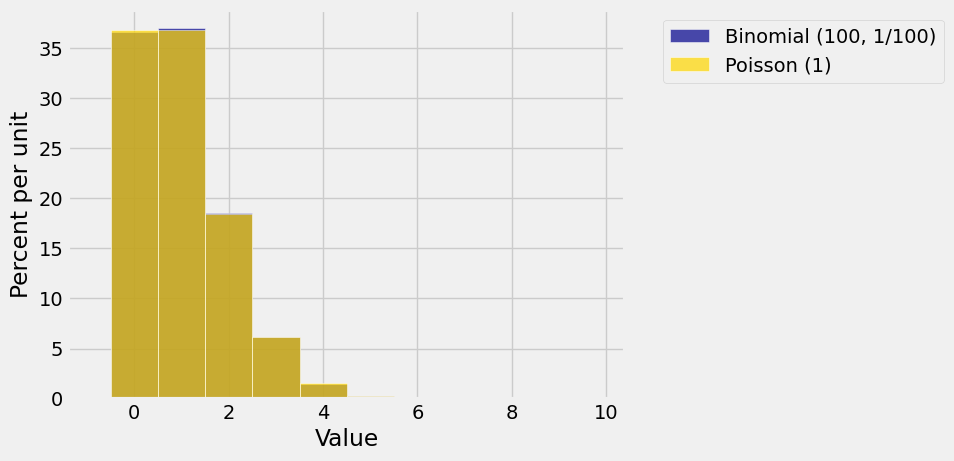

In [8]:
# NO CODE

k = np.arange(10)
poi_1 = stats.poisson.pmf(k, 1)
binom_dist = Table().values(k).probabilities(stats.binom.pmf(k, 100, 0.01))
poisson_dist = Table().values(k).probabilities(stats.poisson.pmf(k, 1))

Plots('Binomial (100, 1/100)', binom_dist, 'Poisson (1)', poisson_dist)

Suppose you run $n$ independent, identically distributed success/failure trials with chance $1/n$ of success on any given trial. Let $X$ be the number of successes. 

Then $X$ has the binomial $(n, 1/n)$ distribution which is well approximated by the Poisson $(1)$ distribution when $n$ is large. If you increase $n$ still further, the distribution of $X$ won't change much. It will still look like the Poisson $(1)$ distribution.